#Importing required libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

#Loading Dataset

In [32]:
#Loading Dataset
data=pd.read_csv('/content/99acres_data (1).csv')
data

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500,1,2 Baths,470,Carpet Area,Residential,Kolshet Road,75000
1,mumbai,75000,3,3 Baths,1800,Super built-up Area,Residential,Sector 21 Nerul,400000
2,mumbai,60000,2,2 Baths,950,Super built-up Area,Residential,Wadala,200000
3,mumbai,52000,3,3 Baths,1300,Carpet Area,Residential,Hiranandani Estate,300000
4,mumbai,30000,1,1 Bath,550,Built-up Area,Residential,Kanjurmarg (East),150000
...,...,...,...,...,...,...,...,...,...
82511,bangalore,8400,1,1 Bath,1000,Carpet Area,Independent,Shivanagar,61000
82512,bangalore,9500,2,1 Bath,600,Built-up Area,Independent,2nd Stage Nagarbhavi,95000
82513,bangalore,7800,1,1 Bath,350,Built-up Area,Independent,Banagiri Nagar,60000
82514,bangalore,5700,1,BHK,1000,Built-up Area,Independent,Channasandra,11400


In [33]:
data.head()

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500,1,2 Baths,470,Carpet Area,Residential,Kolshet Road,75000
1,mumbai,75000,3,3 Baths,1800,Super built-up Area,Residential,Sector 21 Nerul,400000
2,mumbai,60000,2,2 Baths,950,Super built-up Area,Residential,Wadala,200000
3,mumbai,52000,3,3 Baths,1300,Carpet Area,Residential,Hiranandani Estate,300000
4,mumbai,30000,1,1 Bath,550,Built-up Area,Residential,Kanjurmarg (East),150000


In [34]:
data.tail()

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
82511,bangalore,8400,1,1 Bath,1000,Carpet Area,Independent,Shivanagar,61000
82512,bangalore,9500,2,1 Bath,600,Built-up Area,Independent,2nd Stage Nagarbhavi,95000
82513,bangalore,7800,1,1 Bath,350,Built-up Area,Independent,Banagiri Nagar,60000
82514,bangalore,5700,1,BHK,1000,Built-up Area,Independent,Channasandra,11400
82515,bangalore,5000,1,RK\n1 Bath,200,Super built-up Area,Studio,Kamakshipalya,5000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82516 entries, 0 to 82515
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   city                      82516 non-null  object
 1   monthly_rant              82516 non-null  int64 
 2   BHKS                      82516 non-null  int64 
 3   Baths                     82516 non-null  object
 4   sqft_per_inch             82516 non-null  int64 
 5   build_up_area             82516 non-null  object
 6   Type_of_property          82516 non-null  object
 7   location_of_the_property  82516 non-null  object
 8   deposit                   82516 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 5.7+ MB


In [36]:
data.shape

(82516, 9)

In [37]:
np.sum(data.isnull())

city                        0
monthly_rant                0
BHKS                        0
Baths                       0
sqft_per_inch               0
build_up_area               0
Type_of_property            0
location_of_the_property    0
deposit                     0
dtype: int64

#Handling Categorical Values

In [38]:
datTypeSeries = data.dtypes
print("Data type of each column of timesData Dataframe :")
print(datTypeSeries)

Data type of each column of timesData Dataframe :
city                        object
monthly_rant                 int64
BHKS                         int64
Baths                       object
sqft_per_inch                int64
build_up_area               object
Type_of_property            object
location_of_the_property    object
deposit                      int64
dtype: object


In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [40]:
data["city"]=le.fit_transform(data["city"])
data["Baths"]=le.fit_transform(data["Baths"])
data["build_up_area"]=le.fit_transform(data["build_up_area"])
data["Type_of_property"]=le.fit_transform(data["Type_of_property"])
data["location_of_the_property"]=le.fit_transform(data["location_of_the_property"])

In [41]:
data.head()

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,2,17500,1,8,470,1,3,3024,75000
1,2,75000,3,11,1800,3,3,5558,400000
2,2,60000,2,8,950,3,3,7040,200000
3,2,52000,3,11,1300,1,3,2219,300000
4,2,30000,1,0,550,0,3,2756,150000


#Handling outliers

In [42]:
def fun(col):
  sns.boxplot(x=col,data=data)
  plt.show()

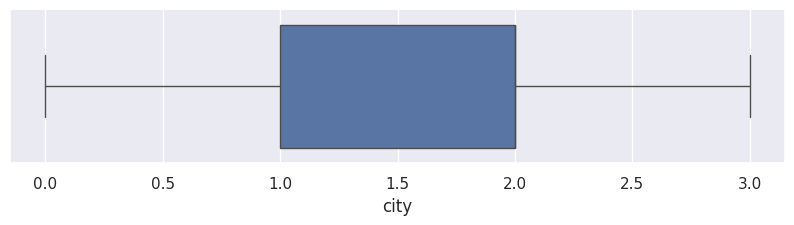

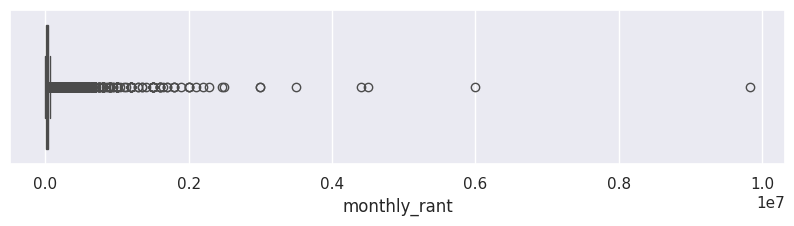

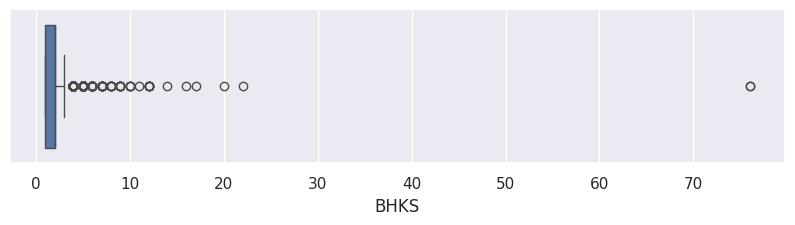

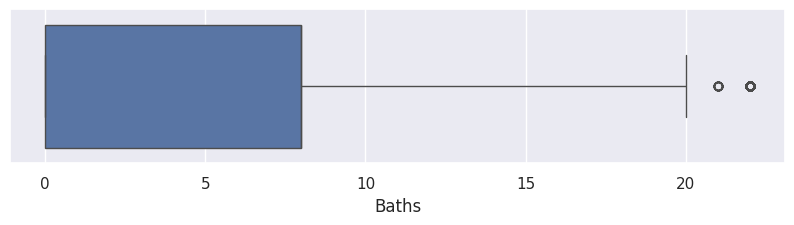

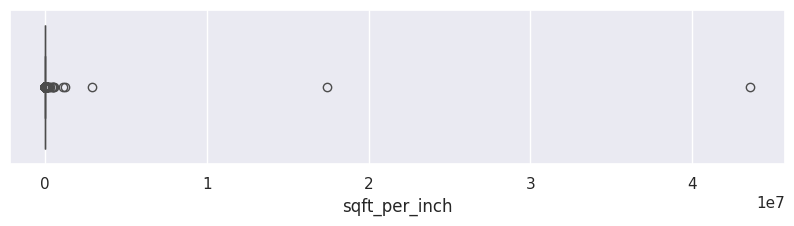

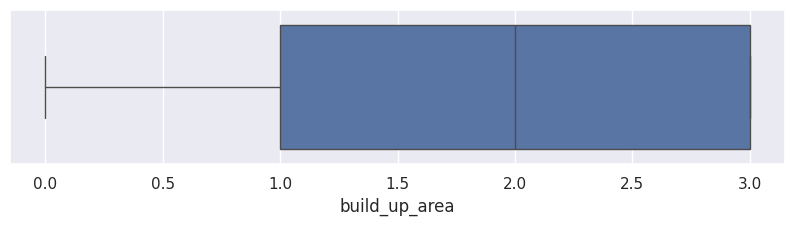

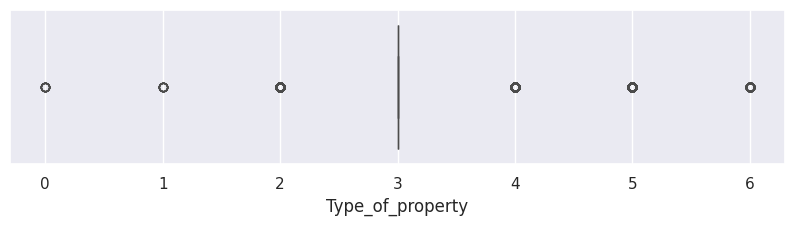

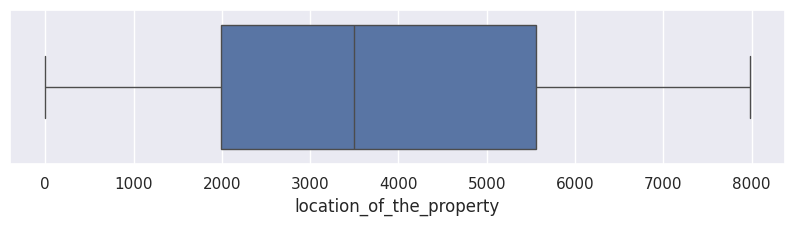

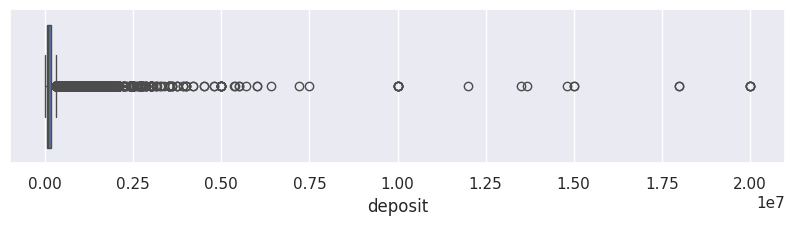

In [43]:
for i in data.columns:
  fun(i)


In [44]:
# Iterate over each column
for column in data.columns:
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(data[column]):
       # Calculate quantiles
       quant = data[column].quantile(q=[0.75, 0.25])
       Q3 = quant.loc[0.75]
       Q1 = quant.loc[0.25]
       # Calculate IQR
       IQR = Q3 - Q1
       # Calculate lower and upper bounds for outliers
       lower_bound = Q1 - 1.5 * IQR
       upper_bound = Q3 + 1.5 * IQR
       # Replace outliers with values within the bounds
       data[column] = np.where(data[column] < lower_bound,lower_bound,data[column])
       data[column] = np.where(data[column] > upper_bound,upper_bound,data[column])
# Now all outliers in the specified columns have been replaced with values within the IQR bounds

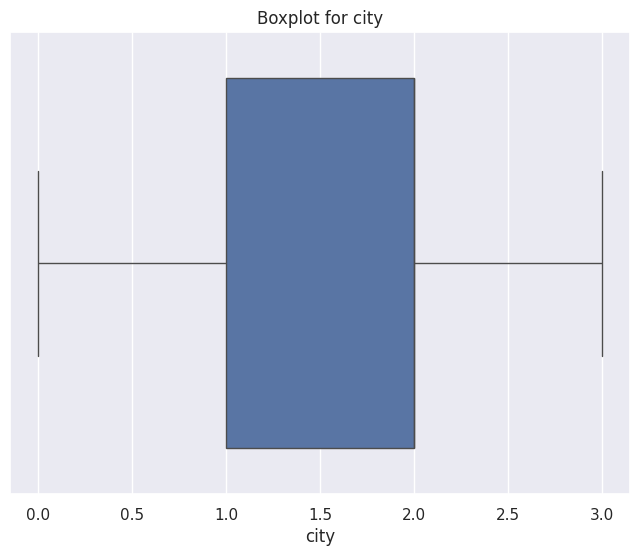

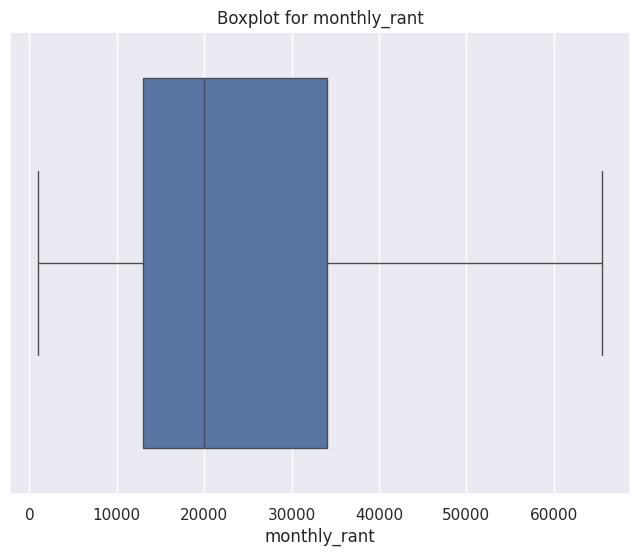

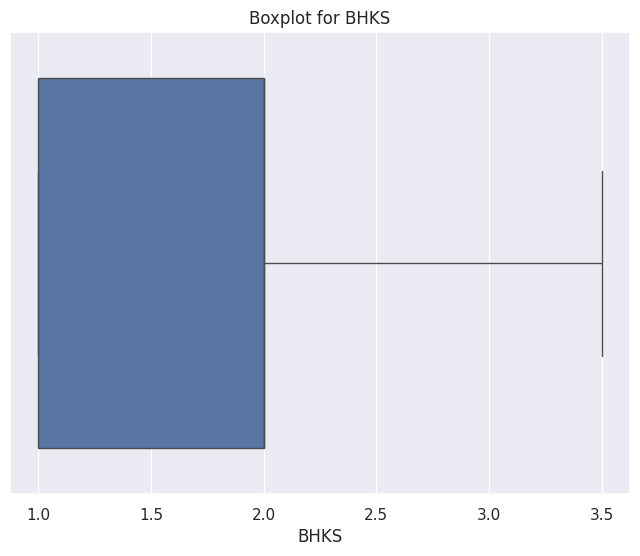

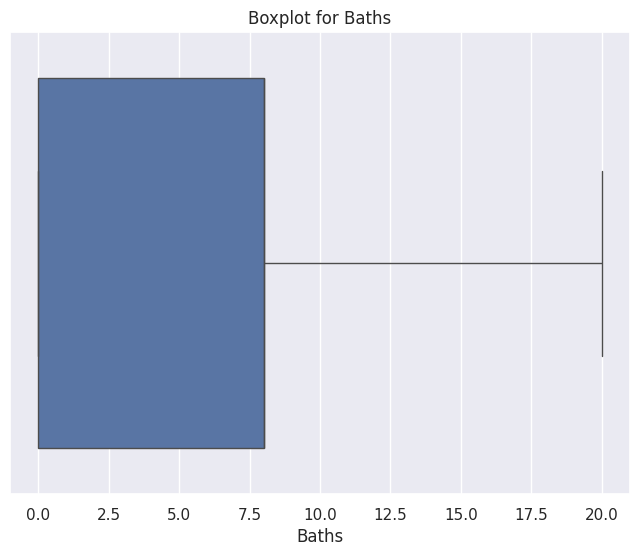

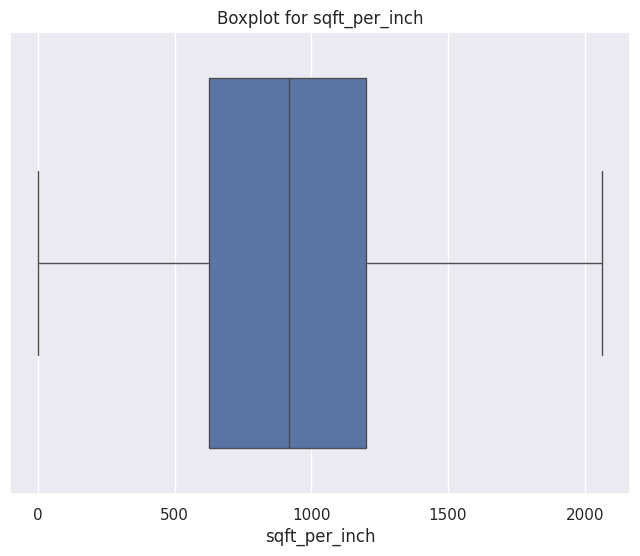

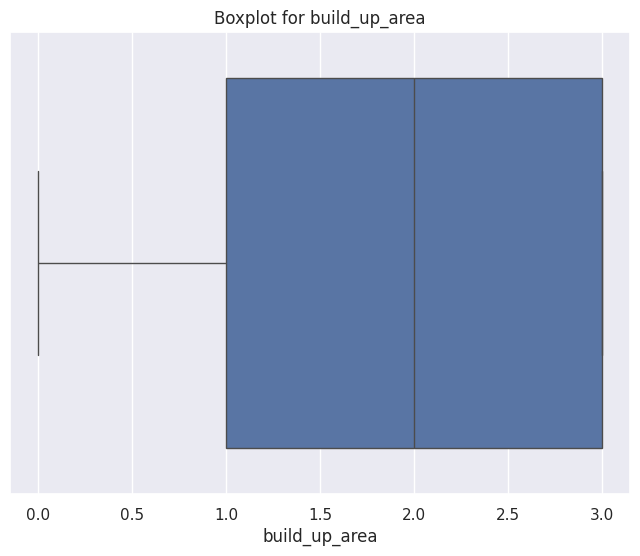

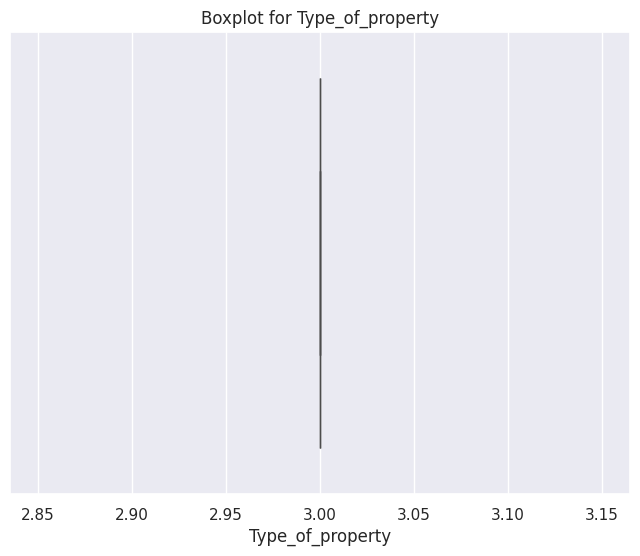

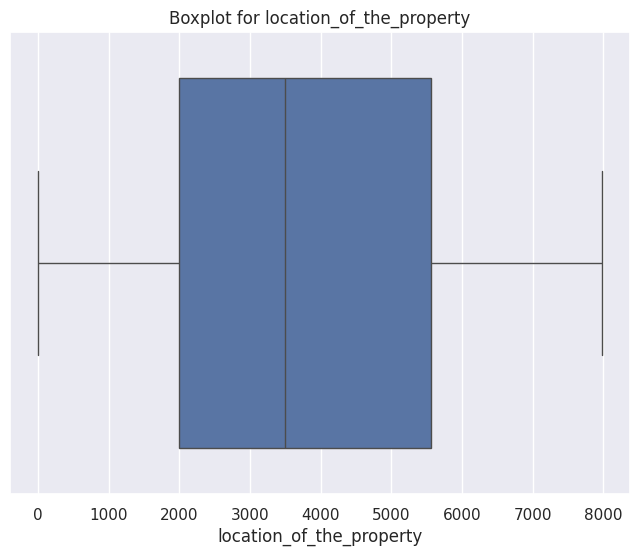

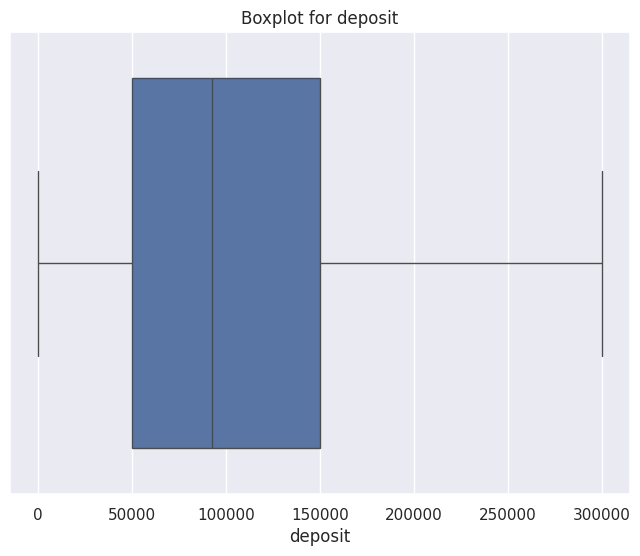

In [45]:
# Iterate over each column and plot boxplot
for column in data.columns:
    plt.figure(figsize=(8, 6)) # Adjust the figure size as needed
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()


#Descriptive Statistical

In [46]:
data.describe(include = "all")

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
count,82516.000000,82516.000000,82516.000000,82516.000000,82516.000000,82516.000000,82516.0,82516.000000,82516.000000
mean,1.692193,25780.219242,1.902686,6.493068,978.925627,1.733506,3.0,3684.225944,113721.331730
std,1.029970,17605.390475,0.755886,4.664801,453.079280,1.234548,0.0,2110.972968,86254.902988
min,0.000000,1000.000000,1.000000,0.000000,1.000000,0.000000,3.0,0.000000,0.000000
25%,1.000000,13000.000000,1.000000,0.000000,625.000000,1.000000,3.0,1993.000000,50000.000000
50%,2.000000,20000.000000,2.000000,8.000000,920.000000,2.000000,3.0,3492.000000,92500.000000
75%,2.000000,34000.000000,2.000000,8.000000,1200.000000,3.000000,3.0,5556.000000,150000.000000
max,3.000000,65500.000000,3.500000,20.000000,2062.500000,3.000000,3.0,7979.000000,300000.000000


#Visual Analysis

Univariate Analysis

Numbers Of Area Type:

build_up_area
3.0    36810
1.0    22788
0.0    18006
2.0     4912
Name: count, dtype: int64


<ipython-input-47-32190ff36031>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='build_up_area', data=data, palette = 'Set2')


<Axes: xlabel='build_up_area', ylabel='count'>

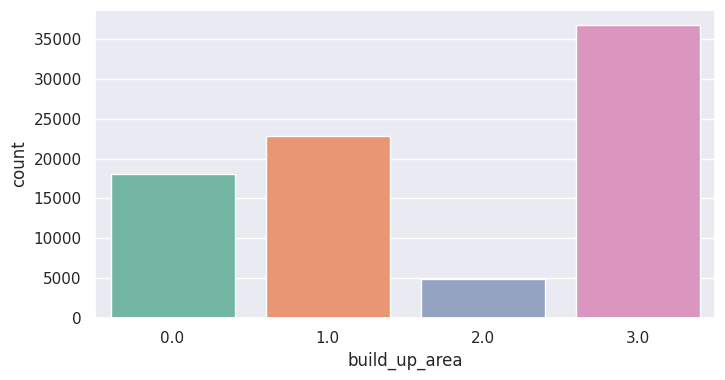

In [47]:
import seaborn as sns
print("Numbers Of Area Type:")
print()
print(data['build_up_area'].value_counts())
sns.set(rc= {'figure.figsize': (8,4)})
sns.countplot(x='build_up_area', data=data, palette = 'Set2')

Types of Property:

Type_of_property
3.0    82516
Name: count, dtype: int64


<ipython-input-48-5da5594666a8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type_of_property', data=data, palette = 'Set2')


<Axes: xlabel='Type_of_property', ylabel='count'>

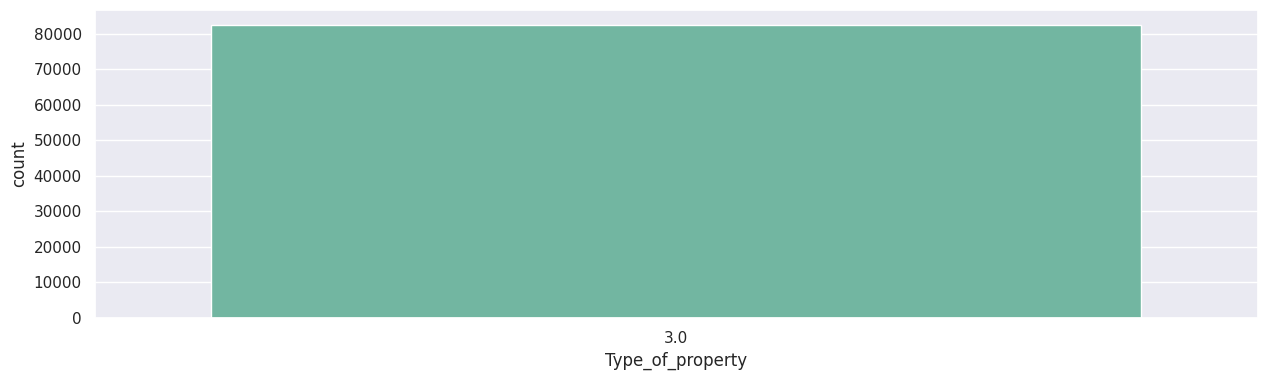

In [48]:
print("Types of Property:")
print()
print(data[ 'Type_of_property'].value_counts())
sns.set(rc = {'figure.figsize': (15,4)})
sns.countplot(x='Type_of_property', data=data, palette = 'Set2')

Property Located Based On City:- 

city
2.0    37566
3.0    18176
0.0    16801
1.0     9973
Name: count, dtype: int64


<ipython-input-49-ae36f4506741>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='city', data=data, palette ='Set2')


<Axes: xlabel='city', ylabel='count'>

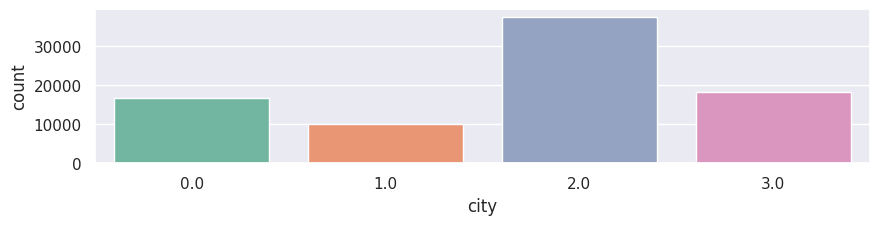

In [49]:
print("Property Located Based On City:- ")
print()
print(data['city'].value_counts())
sns.set(rc={'figure.figsize': (10,2)})
sns.countplot(x='city', data=data, palette ='Set2')

Bivariate Analysis

In [50]:
Top10 = data.head(10)

<ipython-input-51-ea52cd0ac814>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(x=Top10.index,y='monthly_rant',data=Top10).set_xticklabels(labels=Top10.index,rotation=90)


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9')]

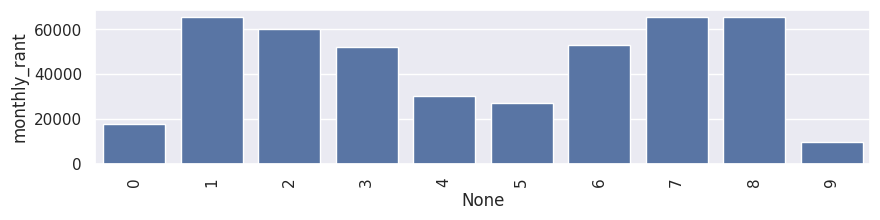

In [51]:
sns.barplot(x=Top10.index,y='monthly_rant',data=Top10).set_xticklabels(labels=Top10.index,rotation=90)


Multivariate Analysis

<Axes: >

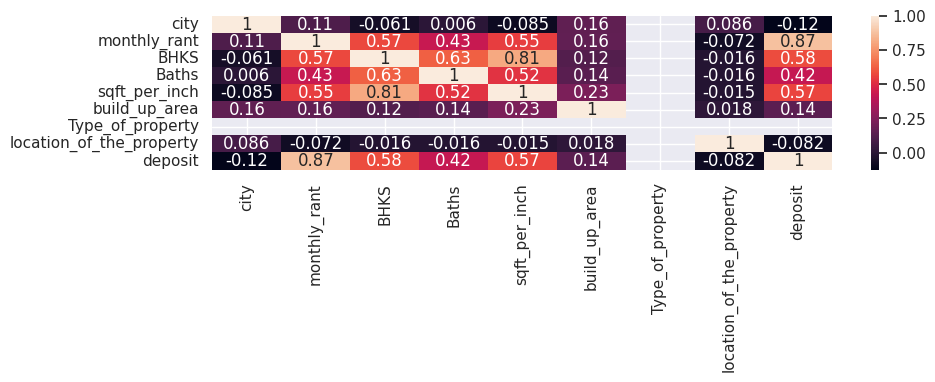

In [52]:
# Assuming 'data' is your DataFrame
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True)

#Descriptive Analysis


In [53]:
data.describe(include='all')

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
count,82516.000000,82516.000000,82516.000000,82516.000000,82516.000000,82516.000000,82516.0,82516.000000,82516.000000
mean,1.692193,25780.219242,1.902686,6.493068,978.925627,1.733506,3.0,3684.225944,113721.331730
std,1.029970,17605.390475,0.755886,4.664801,453.079280,1.234548,0.0,2110.972968,86254.902988
min,0.000000,1000.000000,1.000000,0.000000,1.000000,0.000000,3.0,0.000000,0.000000
25%,1.000000,13000.000000,1.000000,0.000000,625.000000,1.000000,3.0,1993.000000,50000.000000
50%,2.000000,20000.000000,2.000000,8.000000,920.000000,2.000000,3.0,3492.000000,92500.000000
75%,2.000000,34000.000000,2.000000,8.000000,1200.000000,3.000000,3.0,5556.000000,150000.000000
max,3.000000,65500.000000,3.500000,20.000000,2062.500000,3.000000,3.0,7979.000000,300000.000000


#Splitting data into train and test

In [54]:
x = data.drop('monthly_rant',axis=1)
y = data['monthly_rant']

In [55]:
print(x)

       city  BHKS  Baths  sqft_per_inch  build_up_area  Type_of_property  \
0       2.0   1.0    8.0          470.0            1.0               3.0   
1       2.0   3.0   11.0         1800.0            3.0               3.0   
2       2.0   2.0    8.0          950.0            3.0               3.0   
3       2.0   3.0   11.0         1300.0            1.0               3.0   
4       2.0   1.0    0.0          550.0            0.0               3.0   
...     ...   ...    ...            ...            ...               ...   
82511   0.0   1.0    0.0         1000.0            1.0               3.0   
82512   0.0   2.0    0.0          600.0            0.0               3.0   
82513   0.0   1.0    0.0          350.0            0.0               3.0   
82514   0.0   1.0   19.0         1000.0            0.0               3.0   
82515   0.0   1.0   20.0          200.0            3.0               3.0   

       location_of_the_property   deposit  
0                        3024.0   75000.0  

In [56]:
print(y)

0        17500.0
1        65500.0
2        60000.0
3        52000.0
4        30000.0
          ...   
82511     8400.0
82512     9500.0
82513     7800.0
82514     5700.0
82515     5000.0
Name: monthly_rant, Length: 82516, dtype: float64


In [57]:
x.shape

(82516, 8)

In [58]:
y.shape

(82516,)

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8 ,random_state=42)

#Training The Model In Multiple Algorithms

Linear Regression model

In [60]:
linReg = LinearRegression()
linReg.fit(x_train,y_train)

LinearRegression()

In [61]:
y_pred = linReg.predict(x_test)

In [62]:
accuracy = linReg.score(x_test,y_test)
print(accuracy)

0.8139527448447011


Random Forest Model

In [63]:
rf = RandomForestRegressor(n_estimators = 100 , random_state = 0)
rf.fit(x,y)

RandomForestRegressor(random_state=0)

In [64]:
y_pred = rf.predict(x_test)

In [65]:
accuracy = rf.score(x_test,y_test)
print(accuracy)

0.9863832466567757


#XGBoost Regression

In [66]:
import xgboost
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
pred_xgb = xgb_model.predict(x_test)
mae_xgb = mean_absolute_error(y_test, pred_xgb)
mse_xgb = mean_squared_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test, pred_xgb)
print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)
print(accuracy)

MAE: 3266.968
MSE: 25973983.707
RMSE: 5096.468
R-Square: 0.917
0.9863832466567757


#Decision Tree Model:

In [67]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [68]:
y_pred = dt.predict(x_test)

In [69]:
accuracy = dt.score(x_test,y_test)
print(accuracy)

0.9968193356037073


#Testing The Model

In [70]:
data.head()

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,2.0,17500.0,1.0,8.0,470.0,1.0,3.0,3024.0,75000.0
1,2.0,65500.0,3.0,11.0,1800.0,3.0,3.0,5558.0,300000.0
2,2.0,60000.0,2.0,8.0,950.0,3.0,3.0,7040.0,200000.0
3,2.0,52000.0,3.0,11.0,1300.0,1.0,3.0,2219.0,300000.0
4,2.0,30000.0,1.0,0.0,550.0,0.0,3.0,2756.0,150000.0


In [71]:
data.tail()

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
82511,0.0,8400.0,1.0,0.0,1000.0,1.0,3.0,6016.0,61000.0
82512,0.0,9500.0,2.0,0.0,600.0,0.0,3.0,79.0,95000.0
82513,0.0,7800.0,1.0,0.0,350.0,0.0,3.0,748.0,60000.0
82514,0.0,5700.0,1.0,19.0,1000.0,0.0,3.0,1216.0,11400.0
82515,0.0,5000.0,1.0,20.0,200.0,3.0,3.0,2699.0,5000.0


In [72]:
dt.predict([[5.0, 1.0, 11.0, 470.0, 1.0, 3.0, 4674.0, 75000.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([7000.])

In [73]:
dt.predict([[1.0, 4.0, 27.0, 2178.0, 2.0, 2.0, 4195.0, 24000.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([16000.])

In [74]:
# Assuming 'x_test' has the correct number of features (13) and is available in the environment.
# Replace this with the actual data you want to predict on if it's different.
# y_pred = rf.predict([[7,9,1,1,1,1,5]]) # Predict on the first row of x_test as an example
# The above line is incorrect as it passes an array with only 7 features.
# Select the first row of x_test to predict on. This assumes x_test is a pandas DataFrame.
y_pred = dt.predict(x_test.iloc[[0]]) # Predict on the first row of x_test
# If x_test is a NumPy array, use the following:
# y_pred = rf.predict(x_test[[0]]) # Predict on the first row of x_test

In [75]:
print(y_pred)

[19000.]


#Testing Model With Multiple Evaluation Metrics

In [84]:
# Assuming 'x_test' is available in the environment and is a pandas DataFrame or a NumPy array.
y_pred = linReg.predict(x_test) # Predict on the entire x_test dataset
print("Prediction Evaluation using Linear Regression model")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))


Prediction Evaluation using Linear Regression model
Mean Absolute Error: 5351.876689044518
Mean Squared Error: 58028144.81223
Root Mean Squared Error: 7617.620679203579
R-squared: 0.8139527448447011


In [85]:
# Assuming 'x_test' is available in the environment and is a pandas DataFrame␣ or a NumPy array.
y_pred = rf.predict(x_test) # Predict on the entire x_test dataset
print("Prediction Evaluation using Random Forest Regressor model")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))


Prediction Evaluation using Random Forest Regressor model
Mean Absolute Error: 1234.1055166328003
Mean Squared Error: 4247065.801715132
Root Mean Squared Error: 2060.8410423211035
R-squared: 0.9863832466567757


In [86]:
# Assuming 'x_test' is available in the environment and is a pandas DataFrame␣ or a NumPy array.
y_pred = xgb_model.predict(x_test) # Predict on the entire x_test dataset
print("Prediction Evaluation using Gradient Boosting Regressor model")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))


Prediction Evaluation using Gradient Boosting Regressor model
Mean Absolute Error: 3266.968419010756
Mean Squared Error: 25973983.707135137
Root Mean Squared Error: 5096.467767693144
R-squared: 0.9167233694994421


In [87]:
# Assuming 'x_test' is available in the environment and is a pandas DataFrame␣ or a NumPy array.
y_pred = dt.predict(x_test) # Predict on the entire x_test dataset
print("Prediction Evaluation using Decision Tree Regressor")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))


Prediction Evaluation using Decision Tree Regressor
Mean Absolute Error: 237.69089417880275
Mean Squared Error: 992049.3265709098
Root Mean Squared Error: 996.0167300657704
R-squared: 0.9968193356037073


In [90]:
def model_compare(x_train, x_test, y_train, y_test):
# Assuming 'linReg' is a fitted LinearRegression model
    y_pred = linReg.predict(x_test) # Use the predict method of the model
    print("Prediction Evaluation using Linear Regression")
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('R-squared:', r2_score(y_test, y_pred))
    print(-100)
# Similarly for other models (rf, xgb_model), use their predict methods
# ...

In [91]:
model_compare(x_train,x_test,y_train,y_test)

Prediction Evaluation using Linear Regression
Mean Absolute Error: 5351.876689044518
Mean Squared Error: 58028144.81223
Root Mean Squared Error: 7617.620679203579
R-squared: 0.8139527448447011
-100


In [92]:
def model_compare(x_train, x_test, y_train, y_test):
# Assuming 'linReg' is a fitted  Random Forest Regressor model
    y_pred =rf.predict(x_test) # Use the predict method of the model
    print("Prediction Evaluation using Random Forest Regressor")
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('R-squared:', r2_score(y_test, y_pred))
    print(-100)
# Similarly for other models (rf, xgb_model), use their predict methods
# ...

In [93]:
model_compare(x_train,x_test,y_train,y_test)

Prediction Evaluation using Random Forest Regressor
Mean Absolute Error: 1234.1055166328003
Mean Squared Error: 4247065.801715132
Root Mean Squared Error: 2060.8410423211035
R-squared: 0.9863832466567757
-100


In [94]:
def model_compare(x_train, x_test, y_train, y_test):
# Assuming 'linReg' is a fitted Gradient Boosting Regressor  model
    y_pred =xgb_model.predict(x_test) # Use the predict method of the model
    print("Prediction Evaluation using Gradient Boosting Regressor")
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('R-squared:', r2_score(y_test, y_pred))
    print(-100)
# Similarly for other models (rf, xgb_model), use their predict methods
# ...

In [95]:
model_compare(x_train,x_test,y_train,y_test)

Prediction Evaluation using Gradient Boosting Regressor
Mean Absolute Error: 3266.968419010756
Mean Squared Error: 25973983.707135137
Root Mean Squared Error: 5096.467767693144
R-squared: 0.9167233694994421
-100


In [97]:
def model_compare(x_train, x_test, y_train, y_test):
# Assuming 'linReg' is a fitted Decision Tree Regressor  model
    y_pred =dt.predict(x_test) # Use the predict method of the model
    print("Prediction Evaluation using Decision Tree Regressor  model")
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('R-squared:', r2_score(y_test, y_pred))
    print(-100)
# Similarly for other models (rf, xgb_model), use their predict methods
# ...

In [98]:
model_compare(x_train,x_test,y_train,y_test)

Prediction Evaluation using Decision Tree Regressor  model
Mean Absolute Error: 237.69089417880275
Mean Squared Error: 992049.3265709098
Root Mean Squared Error: 996.0167300657704
R-squared: 0.9968193356037073
-100


In [99]:
import pickle
pickle.dump(dt,open('mini.pkl','wb'))